In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

np.random.seed(123) #ensure reproducibility

In [ ]:
plt.style.use('seaborn')
sns.set_style('darkgrid')

In [ ]:
%%capture
!pip install eli5

In [ ]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
%%capture
!pip install shap
!pip install pdpbox

In [ ]:
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots

In [ ]:
%%capture
# get the dataset by running this cell
# https://drive.google.com/file/d/1uEW3i-tenQjp_tsYn9r6GDdBuERpL6Wd/view?usp=sharing

!wget -O heart.csv --no-check-certificate "https://docs.google.com/uc?export=download&id=1uEW3i-tenQjp_tsYn9r6GDdBuERpL6Wd"

In [ ]:
path = '/content/heart.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

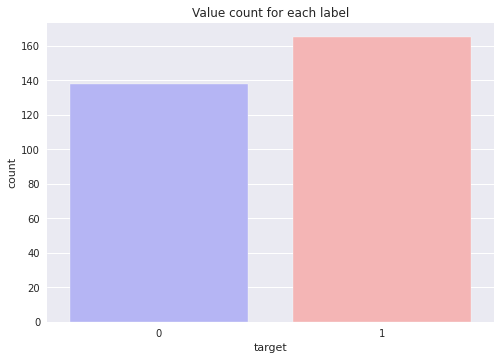

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.title('Value count for each label')

plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

print("Percentage of Patients who don't have Heart Disease : {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients who Have Heart Disease       : {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients who don't have Heart Disease : 45.54%
Percentage of Patients who Have Heart Disease       : 54.46%


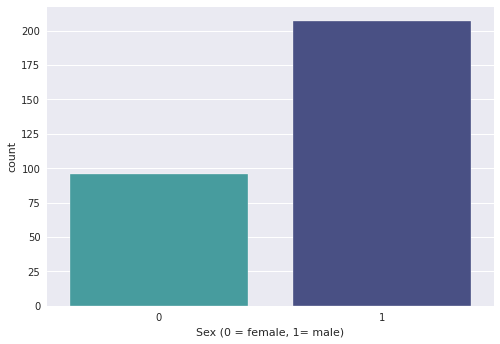

In [ ]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")

plt.show()

In [ ]:
# creating another copy of the data for analysis purposes
dt = pd.read_csv(path)

In [ ]:
# Changing the column names for clarity
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
# Reworking the categorical variables for understanding
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [ ]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [ ]:
# changing the types of some for better handling
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [ ]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [ ]:
dt = pd.get_dummies(dt, drop_first=True)

In [ ]:
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In [ ]:
features = df.drop(['target'], axis=1)
target = df['target']
print(target)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .25, random_state=10) 

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


## Scalling (Normalising both the Train and the Test sets with the same mean and offset.)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(227, 13)

## Section - I

### **Support Vector Machine**

In [ ]:
# SVM library
from sklearn.svm import SVC

In [ ]:
train_data = pd.DataFrame(data=X_train_scaled, index=X_train.index, columns=X_train.columns)
test_data = pd.DataFrame(data=X_test_scaled, index=X_test.index, columns=X_test.columns)

In [ ]:
accuracies = {}

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(train_data, y_train)

acc = svm.score(test_data, y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 81.58%


### **Explicit Feature Mapping**

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn import datasets, svm, pipeline
from time import time


feature_map_nystroem = Nystroem(gamma=.2,  random_state=1)
kernel_svm = SVC(kernel='rbf', gamma = .2)
linear_svm = svm.LinearSVC()

nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("svm", svm.LinearSVC())])

In [ ]:
kernel_svm_time = time()
kernel_class = kernel_svm.fit(train_data, y_train)
kernel_svm_score = kernel_svm.score(test_data, y_test)
kernel_svm_time = time() - kernel_svm_time

linear_svm_time = time()
linear_svm.fit(train_data, y_train)
linear_svm_score = linear_svm.score(test_data, y_test)
linear_svm_time = time() - linear_svm_time

sample_sizes = 11 * np.arange(1, 10)

nystroem_scores = []
nystroem_times = []

In [ ]:
for D in sample_sizes:
    nystroem_approx_svm.set_params(feature_map__n_components=D)
    start = time()
    nystroem_approx_svm.fit(train_data, y_train)
    nystroem_times.append(time() - start)

    nystroem_score = nystroem_approx_svm.score(test_data, y_test)
    nystroem_scores.append(nystroem_score)


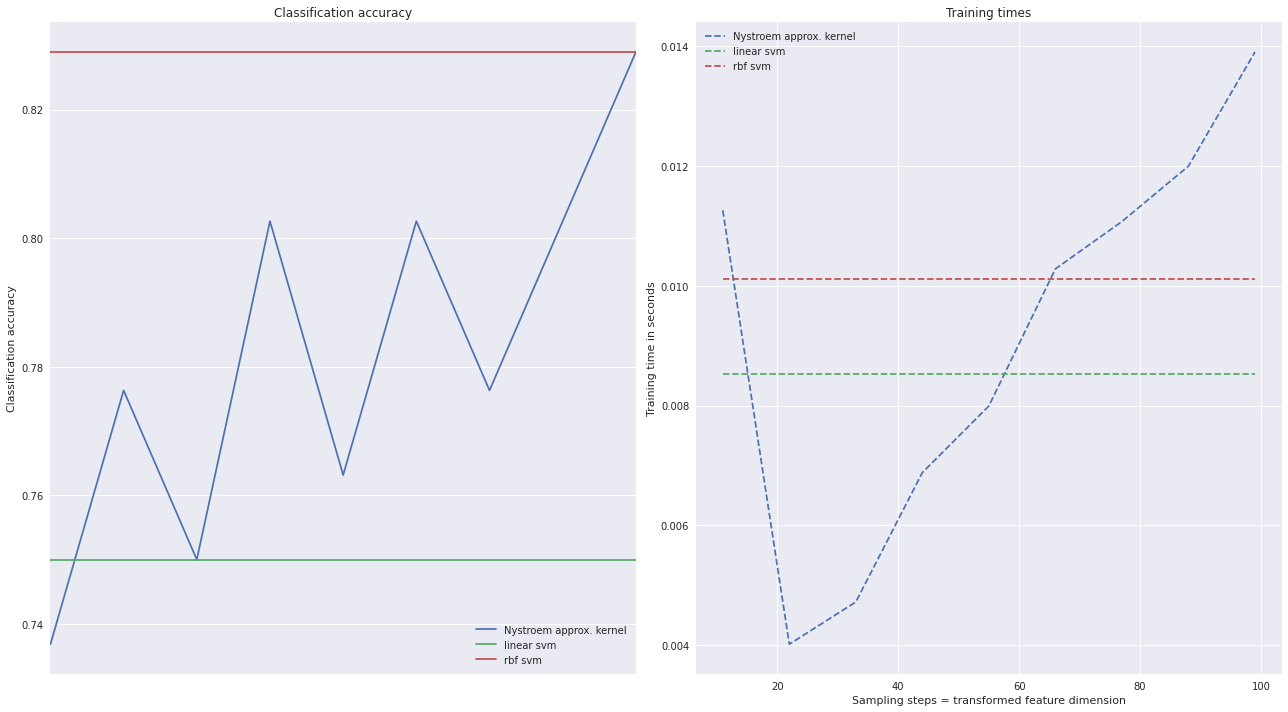

In [ ]:
# plot the results:
plt.figure(figsize=(18, 10))
accuracy = plt.subplot(121)
# second y axis for timings
timescale = plt.subplot(122)

accuracy.plot(sample_sizes, nystroem_scores, label="Nystroem approx. kernel")
timescale.plot(sample_sizes, nystroem_times, '--',
               label='Nystroem approx. kernel')


# horizontal lines for exact rbf and linear kernels:
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [linear_svm_score, linear_svm_score], label="linear svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='linear svm')

accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_score, kernel_svm_score], label="rbf svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [kernel_svm_time, kernel_svm_time], '--', label='rbf svm')


# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
accuracy.set_xticks(())
timescale.set_xlabel("Sampling steps = transformed feature dimension")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
nystroem_score

0.8289473684210527

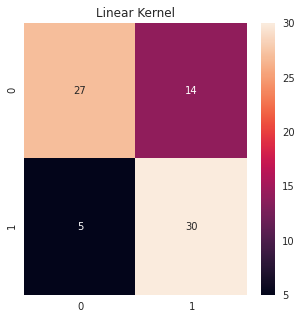

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred = linear_svm.predict(test_data)
cm_linear = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in range(2)],columns = [i for i in range(2)])

y_pred = nystroem_approx_svm.predict(test_data)
cm_nystroem = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in range(2)],columns = [i for i in range(2)])

y_pred = kernel_svm.predict(test_data)
cm_kernel = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in range(2)],columns = [i for i in range(2)])


plt.figure(figsize = (5,5))
plt.title("Linear Kernel")
sns.heatmap(cm_linear, annot=True)

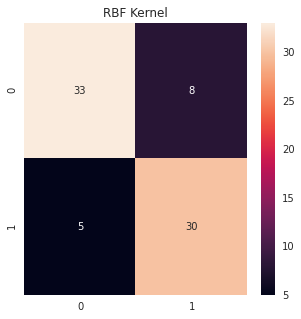

In [ ]:
plt.figure(figsize = (5,5))
plt.title("RBF Kernel")
sns.heatmap(cm_kernel, annot=True)

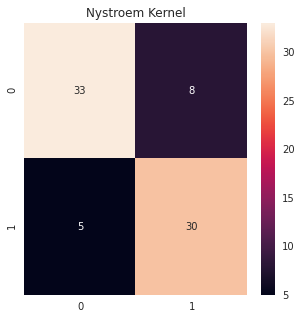

In [ ]:
plt.figure(figsize = (5,5))
plt.title("Nystroem Kernel")
sns.heatmap(cm_nystroem, annot=True)

## Section - II

In [ ]:
# Code not being used right now

'''
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / (test_labels+1))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    
    return accuracy

rf_acc = evaluate(rf_best, test_data, y_test)
print("Test Accuracy of base Random Forest Algorithm: {:.2f}%".format(rf_acc))

best_random = randomized_search.best_estimator_
randomized_acc = evaluate(best_random, test_data, y_test)
print("Test Accuracy of Random Forest Algorithm using RandomizedSearchCV: {:.2f}%".format(randomized_acc))

best_grid = grid_search.best_estimator_
grid_acc = evaluate(best_grid, test_data, y_test)
print("Test Accuracy of Random Forest Algorithm using GridSearchCV: {:.2f}%".format(grid_acc))

accuracies['RandomForest'] = max(rf_acc, randomized_acc, grid_acc)

print('Improvement of {:0.2f}%.'.format( 100 * (accuracies['RandomForest'] - rf_acc) / rf_acc))

'''

'\ndef evaluate(model, test_features, test_labels):\n    predictions = model.predict(test_features)\n    errors = abs(predictions - test_labels)\n    mape = 100 * np.mean(errors / (test_labels+1))\n    accuracy = 100 - mape\n    print(\'Model Performance\')\n    print(\'Average Error: {:0.4f} degrees.\'.format(np.mean(errors)))\n    \n    return accuracy\n\nrf_acc = evaluate(rf_best, test_data, y_test)\nprint("Test Accuracy of base Random Forest Algorithm: {:.2f}%".format(rf_acc))\n\nbest_random = randomized_search.best_estimator_\nrandomized_acc = evaluate(best_random, test_data, y_test)\nprint("Test Accuracy of Random Forest Algorithm using RandomizedSearchCV: {:.2f}%".format(randomized_acc))\n\nbest_grid = grid_search.best_estimator_\ngrid_acc = evaluate(best_grid, test_data, y_test)\nprint("Test Accuracy of Random Forest Algorithm using GridSearchCV: {:.2f}%".format(grid_acc))\n\naccuracies[\'RandomForest\'] = max(rf_acc, randomized_acc, grid_acc)\n\nprint(\'Improvement of {:0.2f}%

### **Random Forest**

In [ ]:
# Following code has been commented out after obtaining the best paraneters for the RandomForestClasifier()

# Uncomment to perfrom GS and randomizedSearch

'''
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Create a based model
rf = RandomForestClassifier()

# Instantiate Randomized Search model
randomized_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 4, verbose=2, random_state=123, n_jobs = -1)

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf = RandomForestClassifier(n_estimators = 10, random_state = 123)
rf.fit(train_data, y_train)

# Fitting the randomizedsearchCV model and printing best parameters
randomized_search.fit(train_data, y_train)
randomized_search.best_params_

# Fitting the gridsearchCV model and printing best parameters
grid_search.fit(train_data, y_train)
grid_search.best_params_

'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n\n# Create a based model\n

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state=10) #split the data

In [ ]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
acc_rf = model.score(X_test_2, y_test_2)*100
accuracies['RF_inter'] = acc_rf
print("Test Accuracy of RandomForest: {:.2f}%".format(acc_rf))

Test Accuracy of RandomForest: 81.97%


In [ ]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train_2.columns]

y_train_str = y_train_2.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [ ]:

#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')


NameError: ignored

In [ ]:
# Best params for RandomForestClassifierthrough GSCV
'''
{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}
'''

"\n{'bootstrap': True,\n 'max_depth': 110,\n 'max_features': 2,\n 'min_samples_leaf': 3,\n 'min_samples_split': 12,\n 'n_estimators': 300}\n"

In [ ]:
rf_best = RandomForestClassifier(bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300)
rf_best.fit(X_train_2, y_train_2)

acc_rf_best = rf_best.score(X_test_2, y_test_2)*100
accuracies['RF_best'] = acc_rf_best
print("Test Accuracy of RandomForest_Tuned: {:.2f}%".format(acc_rf_best))

Test Accuracy of RandomForest_Tuned: 81.97%


In [ ]:
# estimator = grid_search.best_estimator_.estimators_[1]
estimator = rf_best.estimators_[1]
feature_names = [i for i in X_train_2.columns]

y_train_str = y_train_2.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [ ]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

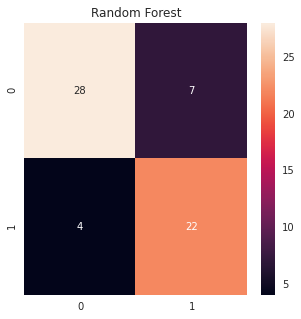

In [ ]:
y_pred_RF_best = rf_best.predict(X_test_2)
cm_RF_best = pd.DataFrame(confusion_matrix(y_test_2, y_pred_RF_best), index = [i for i in range(2)],columns = [i for i in range(2)])


plt.figure(figsize = (5,5))
plt.title("Random Forest")
sns.heatmap(cm_RF_best, annot=True)

In [ ]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

ValueError: ignored

In [ ]:
perm = PermutationImportance(rf_best, random_state=1).fit(X_test_2, y_test_2)
eli5.show_weights(perm, feature_names = X_test_2.columns.tolist())

Weight,Feature
0.0230 ± 0.0161,thalassemia_reversable defect
0.0197 ± 0.0245,thalassemia_fixed defect
0.0164 ± 0.0359,chest_pain_type_atypical angina
0.0131 ± 0.0382,max_heart_rate_achieved
0.0131 ± 0.0245,exercise_induced_angina_yes
0.0098 ± 0.0262,num_major_vessels
0.0066 ± 0.0161,chest_pain_type_non-anginal pain
0.0066 ± 0.0161,chest_pain_type_typical angina
0.0033 ± 0.0245,st_depression
0.0033 ± 0.0245,st_slope_upsloping


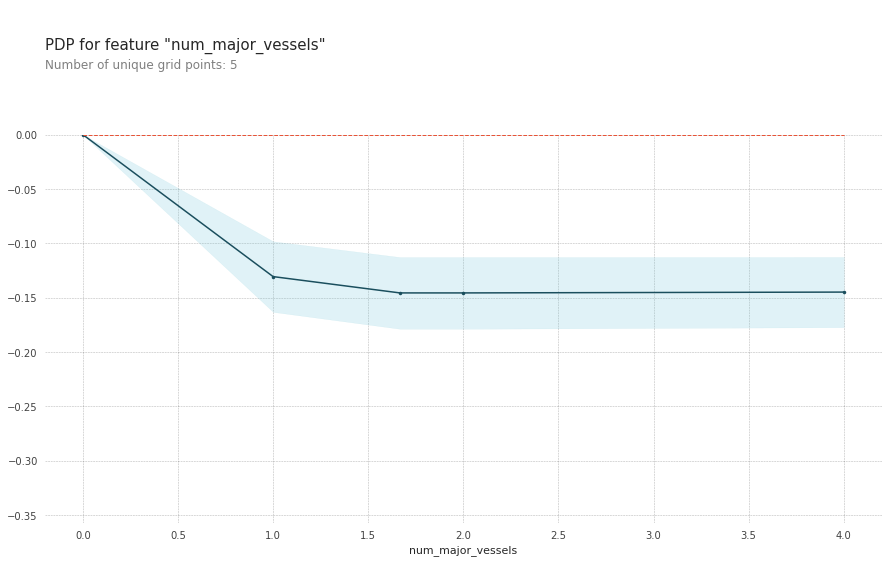

In [ ]:
base_features = dt.columns.values.tolist()
base_features.remove('target')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=rf_best, dataset=X_test_2, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

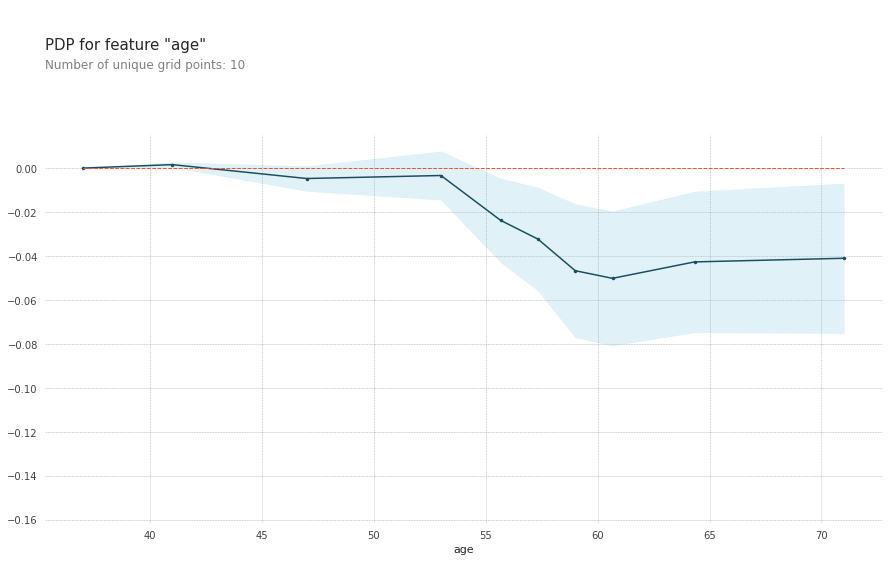

In [ ]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=rf_best, dataset=X_test_2, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

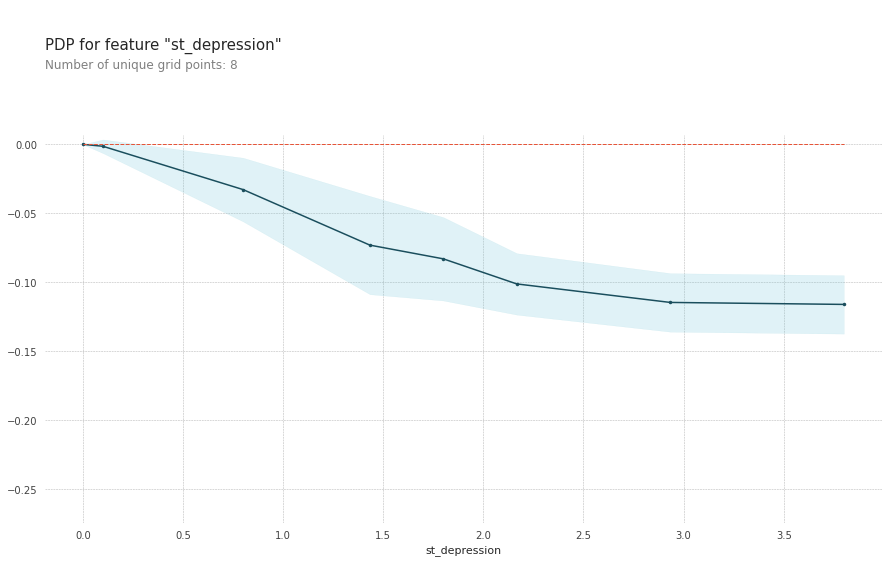

In [ ]:
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=rf_best, dataset=X_test_2, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

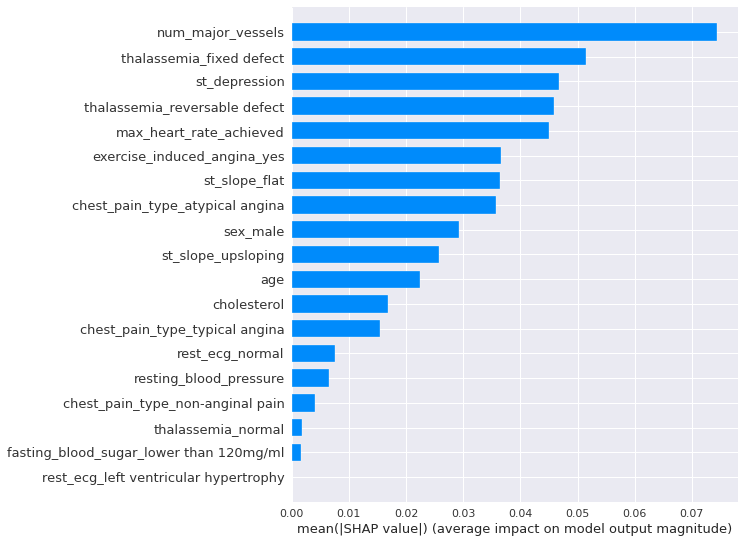

In [ ]:
explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_test_2)

shap.summary_plot(shap_values[1], X_test_2, plot_type="bar")

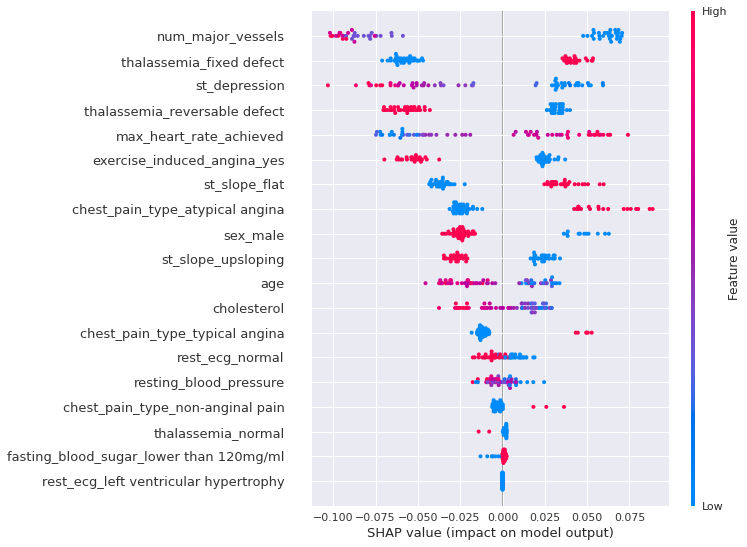

In [ ]:
shap.summary_plot(shap_values[1], X_test_2)

###**Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gdbt = GradientBoostingClassifier(max_depth=5)
model_gdbt.fit(X_train_2, y_train_2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

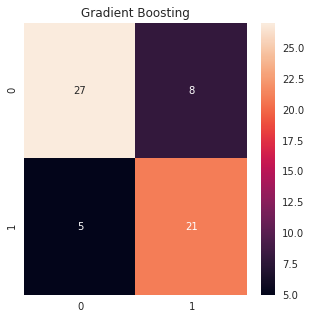

In [ ]:
y_predict = model_gdbt.predict(X_test_2)
y_pred_quant = model_gdbt.predict_proba(X_test_2)[:, 1]
y_pred_bin = model_gdbt.predict(X_test_2)

cm_gdbst = pd.DataFrame(confusion_matrix(y_test_2, y_pred_bin), index = [i for i in range(2)],columns = [i for i in range(2)])

plt.figure(figsize = (5,5))
plt.title("Gradient Boosting")
sns.heatmap(cm_gdbst, annot=True)

In [ ]:
model_gdbt.score(X_test_2, y_test_2)

0.7868852459016393